# UAS DEEP LEARNING (A1)
Cynthia Anne Ramali - 2702254032

Original File: https://colab.research.google.com/drive/10pisfVBmVnvzTXNLqyp6IGDfSEbYjU8s?usp=sharing

In [52]:
!pip install scikeras

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import torch
import torch.nn as nn
from scipy.stats import skew
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout, Bidirectional
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor

In [54]:
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [55]:
data = pd.read_csv('AP003.csv')
data

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,2017-07-01 00:00:00,2017-07-01 01:00:00,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,...,55.22,83.25,1.67,285.50,6.75,737.0,0.03,26.30,0.00,0.65
1,2017-07-01 01:00:00,2017-07-01 02:00:00,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,...,57.48,84.50,2.50,299.50,6.75,736.0,0.05,25.00,1.50,0.50
2,2017-07-01 02:00:00,2017-07-01 03:00:00,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,...,58.67,86.00,0.77,285.67,6.67,736.0,0.03,24.17,0.33,0.43
3,2017-07-01 03:00:00,2017-07-01 04:00:00,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,...,58.93,86.00,1.55,302.50,6.00,735.0,0.08,24.10,0.00,0.63
4,2017-07-01 04:00:00,2017-07-01 05:00:00,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,...,59.88,86.00,2.30,297.25,6.00,735.0,0.08,24.90,0.00,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50395,2023-03-31 19:00:00,2023-03-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50396,2023-03-31 20:00:00,2023-03-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50397,2023-03-31 21:00:00,2023-03-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50398,2023-03-31 22:00:00,2023-03-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
data.shape

(50400, 23)

In [57]:
data.columns

Index(['From Date', 'To Date', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)',
       'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)',
       'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'SR (W/mt2)',
       'BP (mmHg)', 'VWS (m/s)', 'AT (degree C)', 'RF (mm)', 'Xylene (ug/m3)'],
      dtype='object')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        50400 non-null  object 
 1   To Date          50400 non-null  object 
 2   PM2.5 (ug/m3)    44691 non-null  float64
 3   PM10 (ug/m3)     45018 non-null  float64
 4   NO (ug/m3)       46252 non-null  float64
 5   NO2 (ug/m3)      45705 non-null  float64
 6   NOx (ppb)        47040 non-null  float64
 7   NH3 (ug/m3)      45756 non-null  float64
 8   SO2 (ug/m3)      43604 non-null  float64
 9   CO (mg/m3)       46993 non-null  float64
 10  Ozone (ug/m3)    45309 non-null  float64
 11  Benzene (ug/m3)  46678 non-null  float64
 12  Toluene (ug/m3)  46678 non-null  float64
 13  Temp (degree C)  46335 non-null  float64
 14  RH (%)           46520 non-null  float64
 15  WS (m/s)         46522 non-null  float64
 16  WD (degree)      44710 non-null  float64
 17  SR (W/mt2)  

## a) EDA

In [59]:
data.duplicated().sum()

np.int64(0)

In [60]:
categorical_cols = []
numerical_cols = []

for column in data.columns:
    if ('int' in str(data[column].dtype) or 'float' in str(data[column].dtype)):
        numerical_cols.append(column)
    elif str(data[column].dtype) == 'object':
        categorical_cols.append(column)

print(f'Categorical:\n {categorical_cols}')
print()
print(f'Numerical:\n {numerical_cols}')

Categorical:
 ['From Date', 'To Date']

Numerical:
 ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'AT (degree C)', 'RF (mm)', 'Xylene (ug/m3)']


In [61]:
for value in categorical_cols:
    print(f'{value}:')
    print(data[value].unique())
    print(f'\nValue counts of {data[value].value_counts()}\n')
    print('-'*50)
    print()

From Date:
['2017-07-01 00:00:00' '2017-07-01 01:00:00' '2017-07-01 02:00:00' ...
 '2023-03-31 21:00:00' '2023-03-31 22:00:00' '2023-03-31 23:00:00']

Value counts of From Date
2023-03-31 07:00:00    1
2023-03-31 06:00:00    1
2023-03-31 05:00:00    1
2023-03-31 04:00:00    1
2023-03-31 03:00:00    1
                      ..
2017-07-01 04:00:00    1
2017-07-01 03:00:00    1
2017-07-01 02:00:00    1
2017-07-01 01:00:00    1
2017-07-01 00:00:00    1
Name: count, Length: 50400, dtype: int64

--------------------------------------------------

To Date:
['2017-07-01 01:00:00' '2017-07-01 02:00:00' '2017-07-01 03:00:00' ...
 '2023-03-31 22:00:00' '2023-03-31 23:00:00' '2023-04-01 00:00:00']

Value counts of To Date
2023-03-31 08:00:00    1
2023-03-31 07:00:00    1
2023-03-31 06:00:00    1
2023-03-31 05:00:00    1
2023-03-31 04:00:00    1
                      ..
2017-07-01 05:00:00    1
2017-07-01 04:00:00    1
2017-07-01 03:00:00    1
2017-07-01 02:00:00    1
2017-07-01 01:00:00    1
Name: 

In [62]:
data['datetime'] = pd.to_datetime(data['From Date'])
data.set_index('datetime', inplace=True)
data = data.drop(columns=['From Date', 'To Date'])

new_order = [col for col in data.columns if col not in ['AT (degree C)']] + ['AT (degree C)']
data = data[new_order]
data

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,Temp (degree C),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),RF (mm),Xylene (ug/m3),AT (degree C)
datetime,,,,,,,,,,,,,,,,,,,,,
2017-07-01 00:00:00,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,NaN,0.58,...,55.22,83.25,1.67,285.50,6.75,737.0,0.03,0.00,0.65,26.30
2017-07-01 01:00:00,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,NaN,0.45,...,57.48,84.50,2.50,299.50,6.75,736.0,0.05,1.50,0.50,25.00
2017-07-01 02:00:00,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,NaN,0.53,...,58.67,86.00,0.77,285.67,6.67,736.0,0.03,0.33,0.43,24.17
2017-07-01 03:00:00,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,144.42,0.75,...,58.93,86.00,1.55,302.50,6.00,735.0,0.08,0.00,0.63,24.10
2017-07-01 04:00:00,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,42.65,0.78,...,59.88,86.00,2.30,297.25,6.00,735.0,0.08,0.00,0.67,24.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
new_col_names = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene',
                 'Temp', 'RH',	'WS',	'WD',	'SR', 'BP', 'VWS',	'RF',	'Xylene', 'AT']
data.columns = new_col_names

In [64]:
df = pd.DataFrame(data)
df

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,...,Temp,RH,WS,WD,SR,BP,VWS,RF,Xylene,AT
datetime,,,,,,,,,,,,,,,,,,,,,
2017-07-01 00:00:00,50.00,91.75,3.33,27.70,17.48,NaN,24.35,1.33,NaN,0.58,...,55.22,83.25,1.67,285.50,6.75,737.0,0.03,0.00,0.65,26.30
2017-07-01 01:00:00,30.75,59.25,1.20,20.78,11.40,0.03,8.23,1.77,NaN,0.45,...,57.48,84.50,2.50,299.50,6.75,736.0,0.05,1.50,0.50,25.00
2017-07-01 02:00:00,NaN,NaN,1.17,4.07,2.73,0.10,10.77,1.20,NaN,0.53,...,58.67,86.00,0.77,285.67,6.67,736.0,0.03,0.33,0.43,24.17
2017-07-01 03:00:00,8.00,NaN,2.58,6.38,5.30,NaN,19.78,1.58,144.42,0.75,...,58.93,86.00,1.55,302.50,6.00,735.0,0.08,0.00,0.63,24.10
2017-07-01 04:00:00,33.25,NaN,5.30,21.03,15.47,0.15,22.40,2.25,42.65,0.78,...,59.88,86.00,2.30,297.25,6.00,735.0,0.08,0.00,0.67,24.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df.shape

(50400, 21)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50400 entries, 2017-07-01 00:00:00 to 2023-03-31 23:00:00
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    44691 non-null  float64
 1   PM10     45018 non-null  float64
 2   NO       46252 non-null  float64
 3   NO2      45705 non-null  float64
 4   NOx      47040 non-null  float64
 5   NH3      45756 non-null  float64
 6   SO2      43604 non-null  float64
 7   CO       46993 non-null  float64
 8   Ozone    45309 non-null  float64
 9   Benzene  46678 non-null  float64
 10  Toluene  46678 non-null  float64
 11  Temp     46335 non-null  float64
 12  RH       46520 non-null  float64
 13  WS       46522 non-null  float64
 14  WD       44710 non-null  float64
 15  SR       47045 non-null  float64
 16  BP       43680 non-null  float64
 17  VWS      47043 non-null  float64
 18  RF       47148 non-null  float64
 19  Xylene   46658 non-null  float64
 20  AT       46370 

In [67]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,...,Temp,RH,WS,WD,SR,BP,VWS,RF,Xylene,AT
count,44691.000000,45018.000000,46252.000000,45705.000000,47040.000000,45756.000000,43604.000000,46993.000000,45309.000000,46678.000000,...,46335.000000,46520.000000,46522.000000,44710.000000,47045.000000,43680.000000,47043.000000,47148.000000,46658.000000,46370.000000
mean,46.869591,111.938589,14.817678,34.921808,29.857413,13.813287,12.323789,0.666865,29.118732,3.309707,...,29.408316,73.166650,1.895205,209.078558,127.619004,746.903387,0.017120,0.022934,2.649006,27.591552
std,35.201161,74.285923,22.372042,23.912796,27.042412,14.685377,10.266289,0.550187,29.388645,2.926522,...,3.228845,8.592562,1.199727,67.168061,175.790733,7.656193,0.071902,0.282441,8.785483,4.426638
min,0.250000,1.000000,0.030000,0.030000,0.000000,0.020000,0.030000,0.000000,0.100000,0.000000,...,6.700000,15.750000,0.100000,7.000000,0.000000,700.000000,-0.550000,0.000000,0.000000,5.180000
25%,23.415000,63.330000,2.915000,18.400000,12.670000,7.050000,6.350000,0.330000,9.930000,1.500000,...,27.900000,68.000000,0.880000,157.250000,6.250000,743.000000,0.000000,0.000000,0.570000,24.830000
50%,38.750000,97.750000,6.600000,30.300000,22.910000,11.600000,10.680000,0.590000,17.570000,2.700000,...,28.850000,74.330000,1.800000,220.000000,8.250000,747.500000,0.000000,0.000000,1.300000,27.650000
75%,62.330000,137.500000,17.300000,43.900000,36.930000,16.770000,15.520000,0.890000,37.680000,4.380000,...,30.180000,79.670000,2.730000,262.670000,227.500000,751.000000,0.050000,0.000000,2.770000,30.400000
max,840.000000,904.000000,419.780000,420.200000,408.250000,454.900000,194.250000,11.280000,199.300000,91.000000,...,59.880000,92.000000,7.970000,360.000000,730.000000,770.000000,1.680000,12.500000,410.850000,48.500000


In [68]:
df['AT'].value_counts()

,count
AT,
27.60,167
28.20,151
28.10,149
27.20,148
27.10,147
...,...
38.13,1
40.67,1
40.62,1


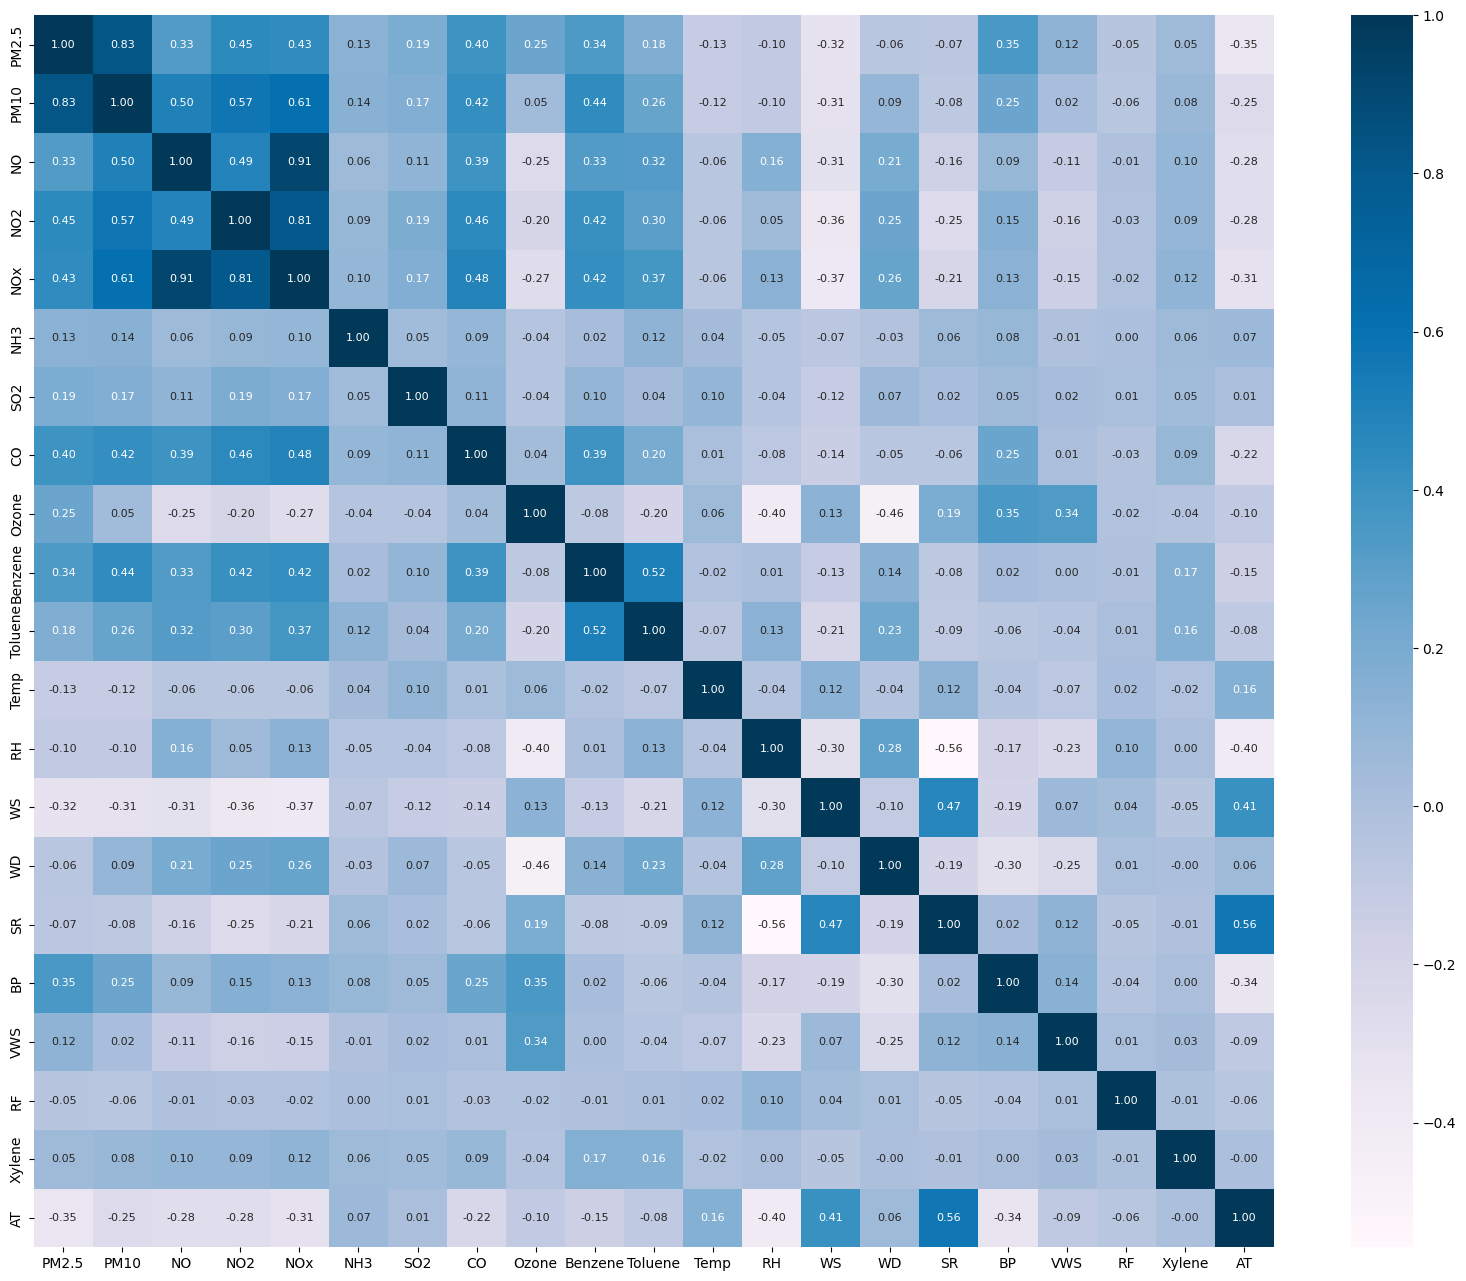

In [69]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True, cmap="PuBu", fmt='.2f', annot_kws={'size': 8})
plt.show()

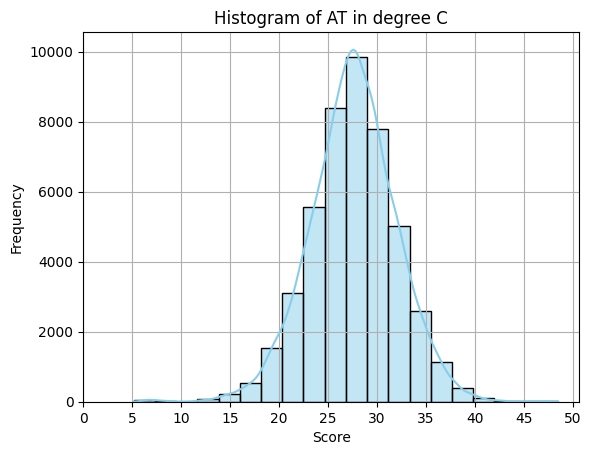

In [70]:
sns.histplot(df['AT'], bins=20, color='skyblue', kde=True, edgecolor='black')
plt.title('Histogram of AT in degree C')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(np.arange(0, 51, 5))
plt.show()

## b) Split Data & Do Pre-Processing

### Impute Missing Values

In [71]:
df.isna().sum()

,0
PM2.5,5709
PM10,5382
NO,4148
NO2,4695
NOx,3360
NH3,4644
SO2,6796
CO,3407
Ozone,5091
Benzene,3722


In [72]:
cols_to_impute = df.columns
cols_to_impute

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone',
       'Benzene', 'Toluene', 'Temp', 'RH', 'WS', 'WD', 'SR', 'BP', 'VWS', 'RF',
       'Xylene', 'AT'],
      dtype='object')

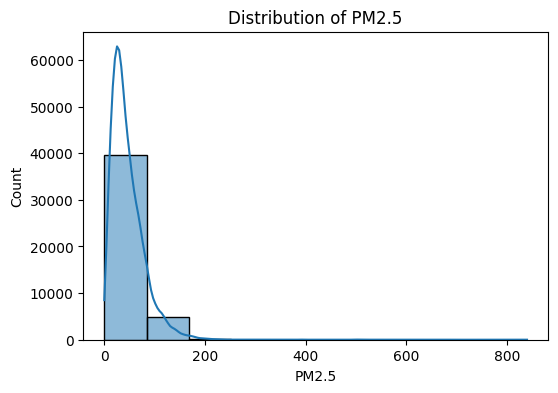

Skewness of PM2.5: 3.8119028929514385




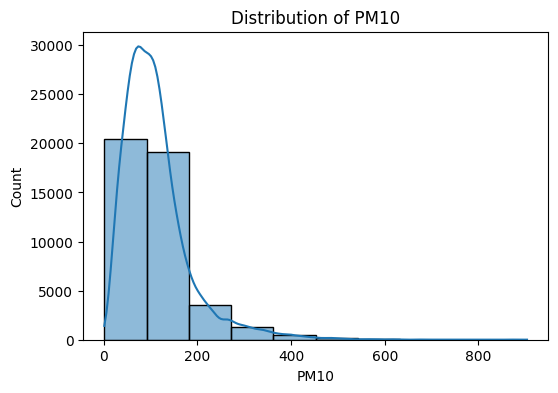

Skewness of PM10: 2.148605021594894




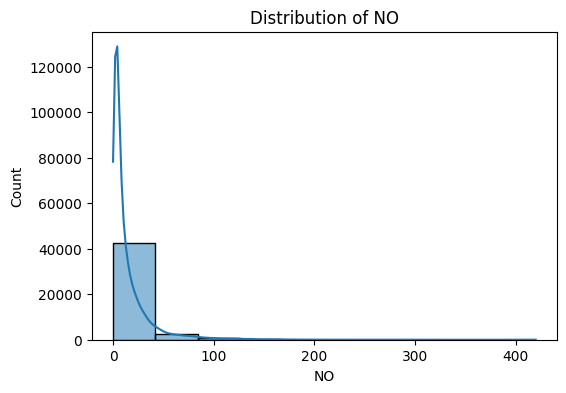

Skewness of NO: 4.012022422548821




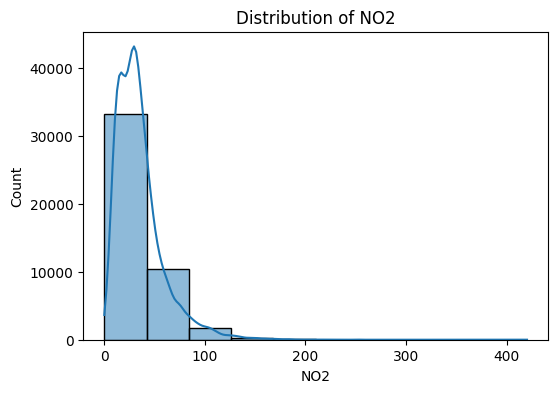

Skewness of NO2: 1.9272022529777975




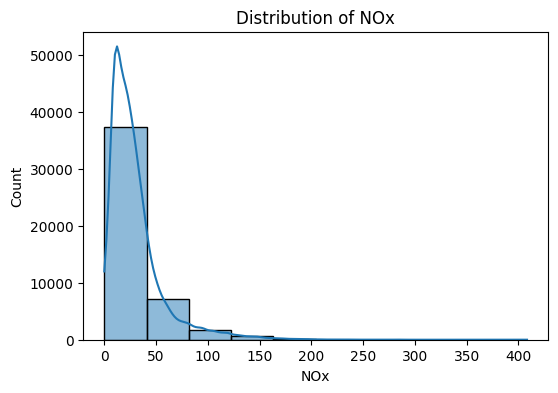

Skewness of NOx: 2.590801135870833




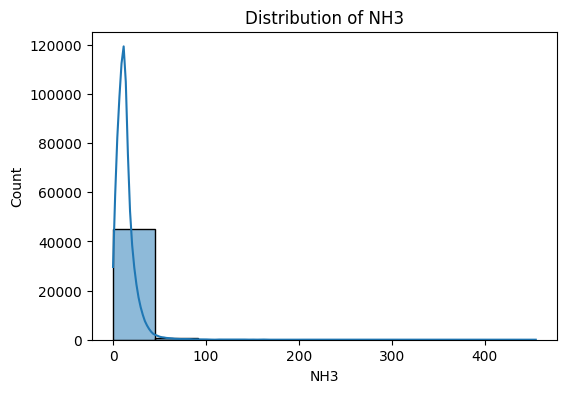

Skewness of NH3: 10.590669064299282




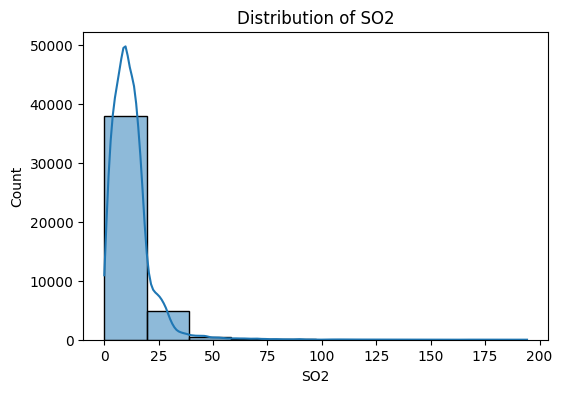

Skewness of SO2: 4.648003150412766




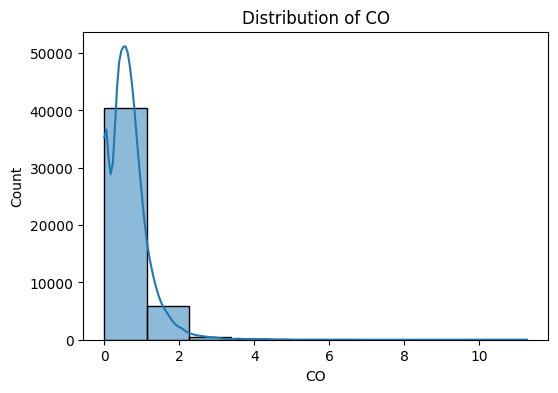

Skewness of CO: 3.086133666036488




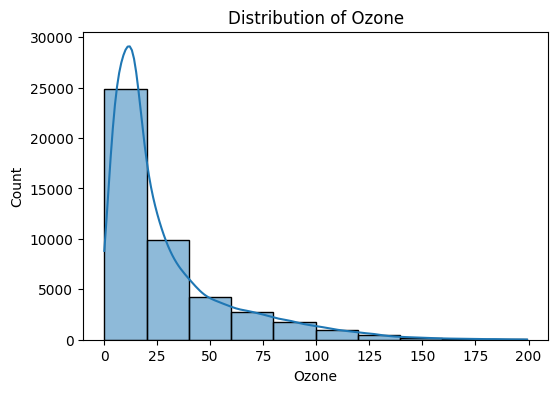

Skewness of Ozone: 1.8823386786374854




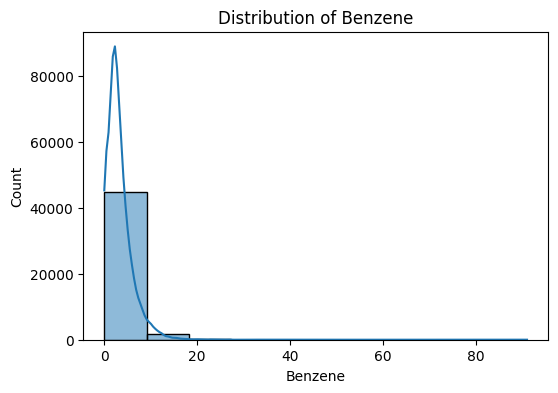

Skewness of Benzene: 5.03140919992766




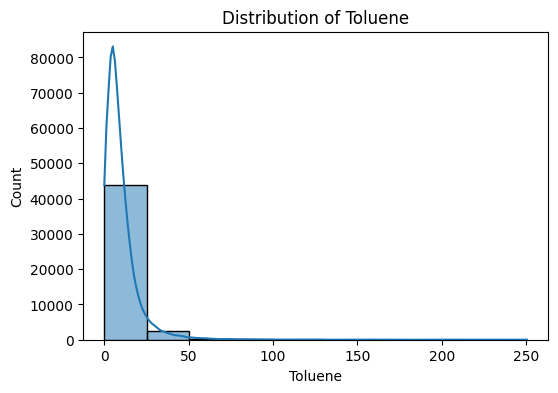

Skewness of Toluene: 5.3226787278399925




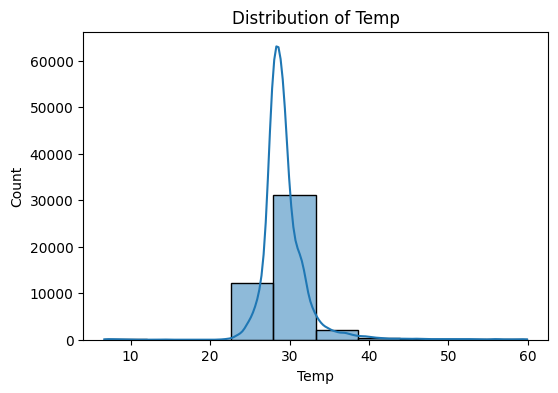

Skewness of Temp: 2.8673323032283284




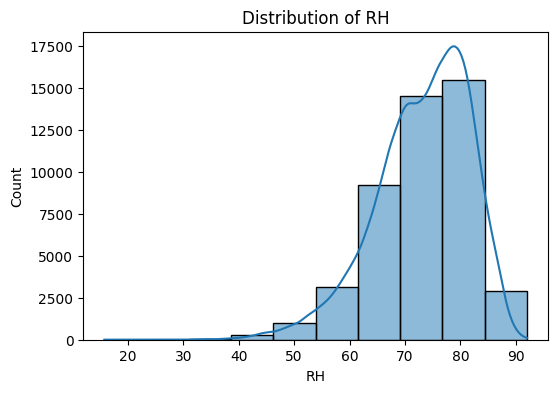

Skewness of RH: -0.7675440601339633




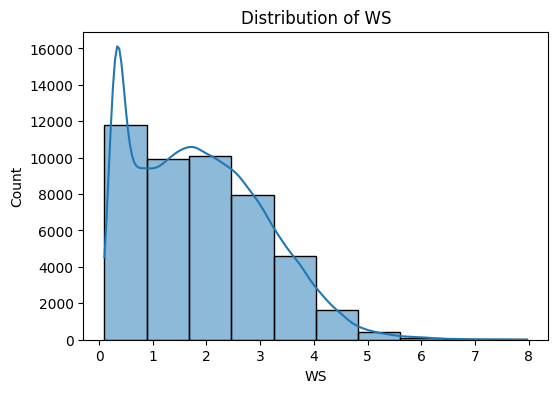

Skewness of WS: 0.557022014306694




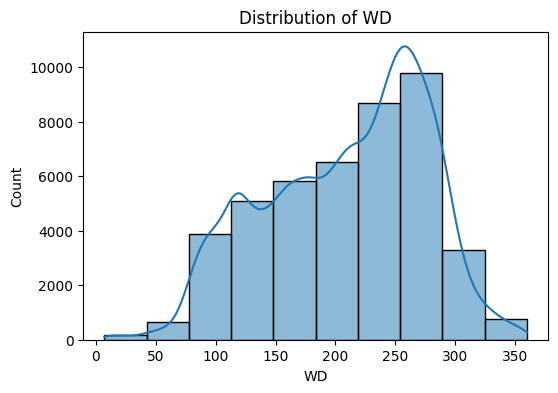

Skewness of WD: -0.34910681453972636




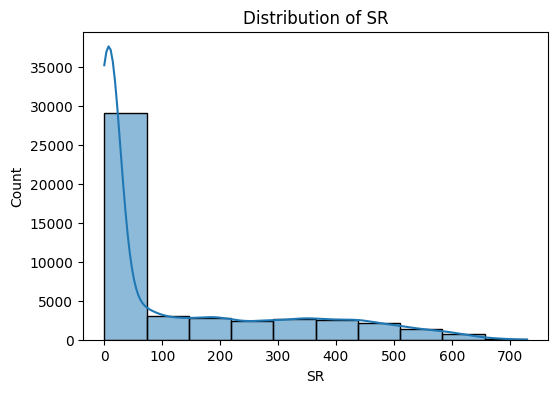

Skewness of SR: 1.2658146843647415




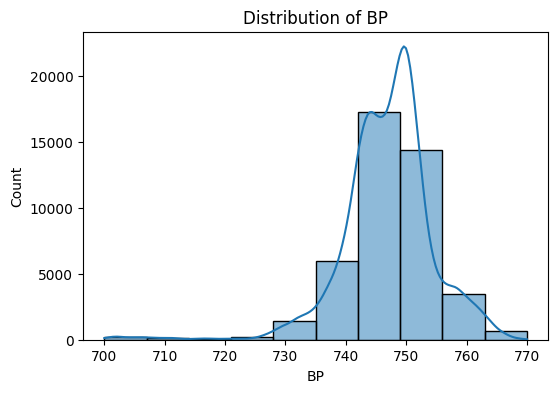

Skewness of BP: -1.2407188435207912




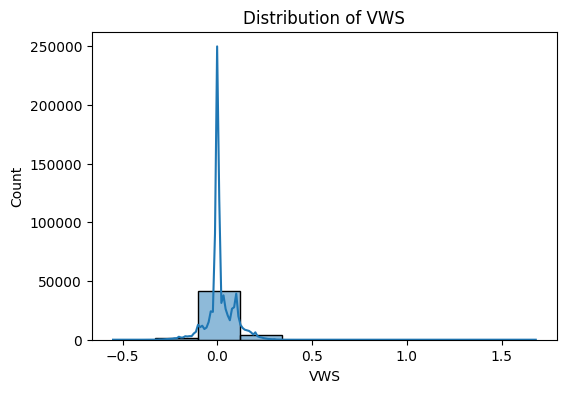

Skewness of VWS: 0.3651568971944066




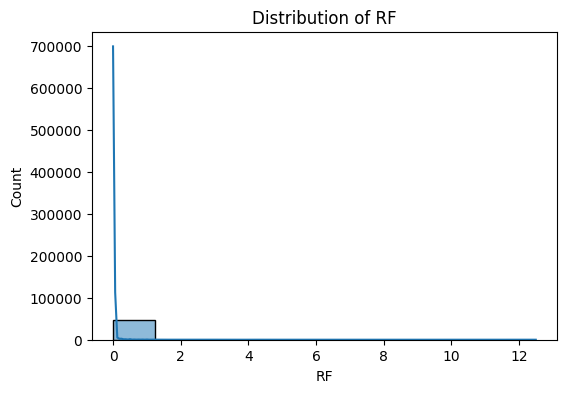

Skewness of RF: 22.3781981814543




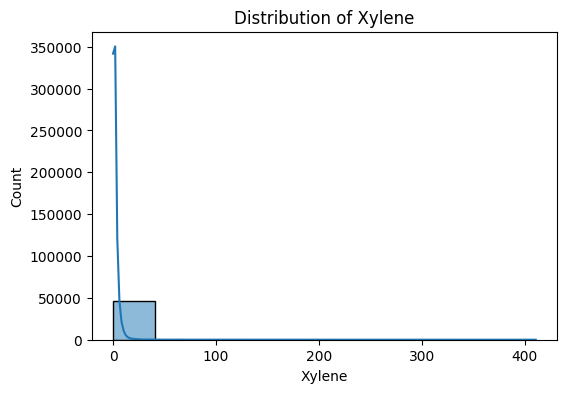

Skewness of Xylene: 20.242486862760135




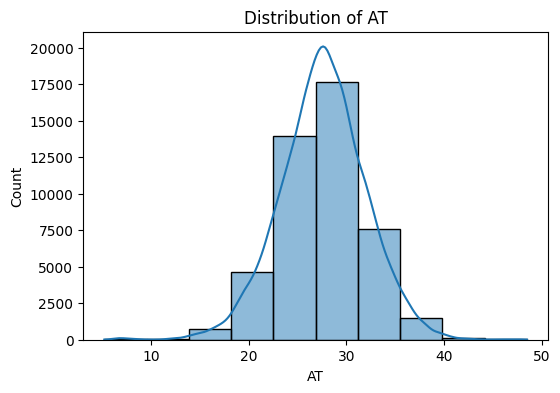

Skewness of AT: -0.1499038472252847




In [73]:
for col in cols_to_impute:
    if ('float' in str(df[col].dtype)):
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], kde=True, bins=10)
        plt.title(f"Distribution of {col}")
        plt.show()

        print(f"Skewness of {col}: {skew(df[col].dropna())}\n")
        print()

In [74]:
for col in cols_to_impute:
    skewness = df[col].skew()
    imputation_value = 0

    if -0.5 < skewness < 0.5:
        imputation_value = df[col].mean()
    else:
        imputation_value = df[col].median()

    df[col].fillna(imputation_value, inplace=True)

In [75]:
print(f'Missing Values in df:\n{df.isna().sum()}')

Missing Values in df:
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
SO2        0
CO         0
Ozone      0
Benzene    0
Toluene    0
Temp       0
RH         0
WS         0
WD         0
SR         0
BP         0
VWS        0
RF         0
Xylene     0
AT         0
dtype: int64


### Check Outliers Using Boxplot

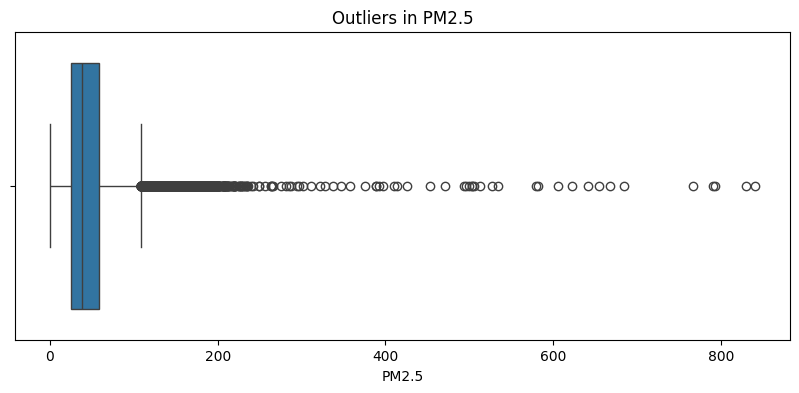

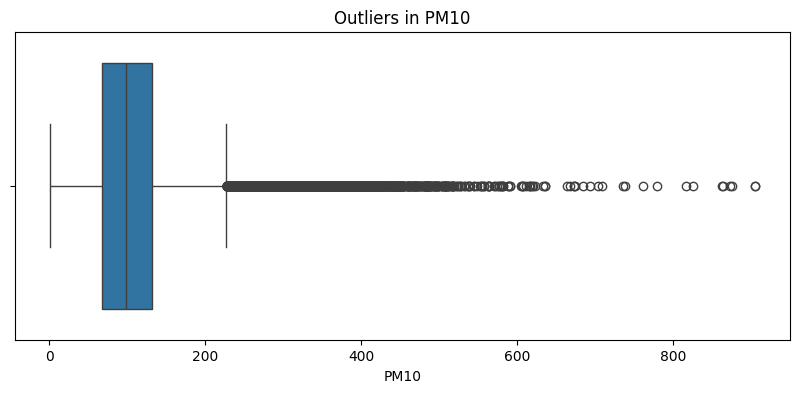

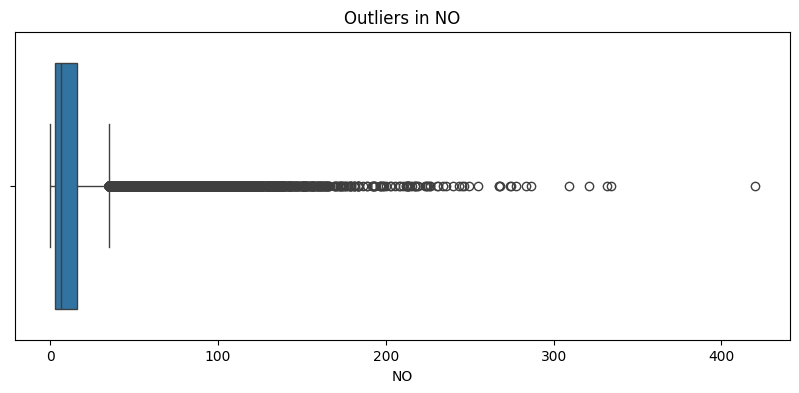

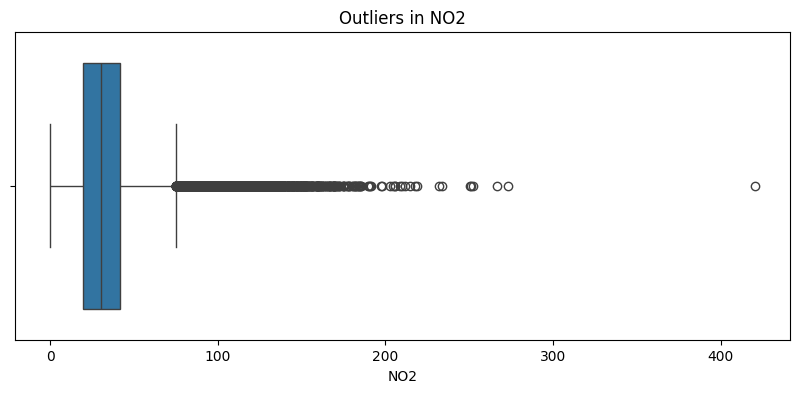

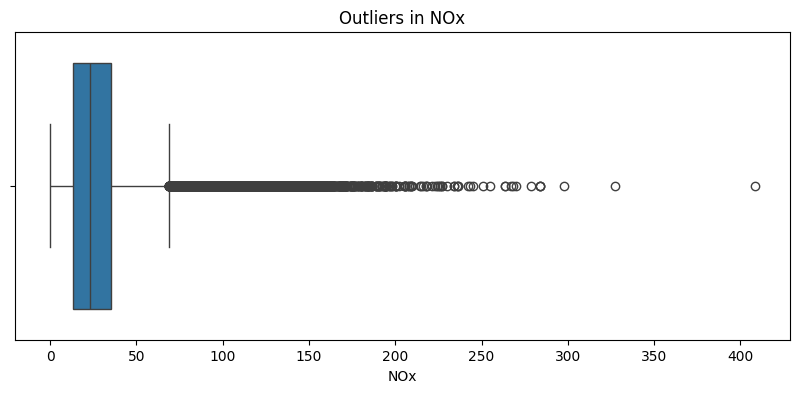

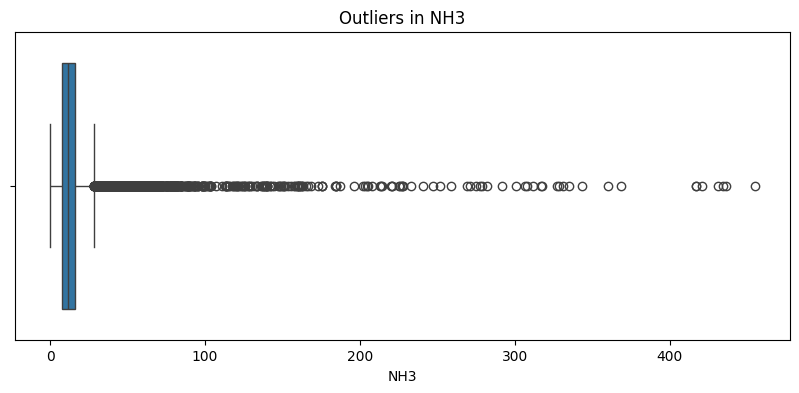

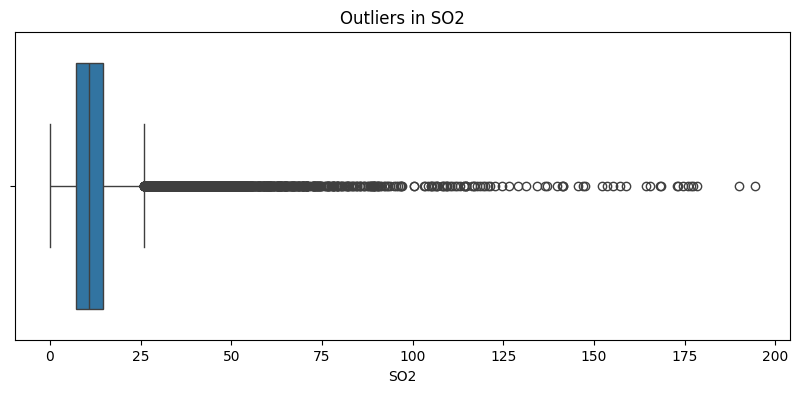

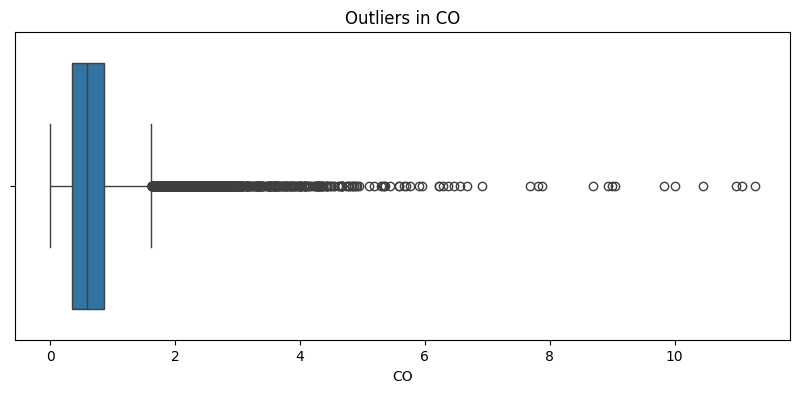

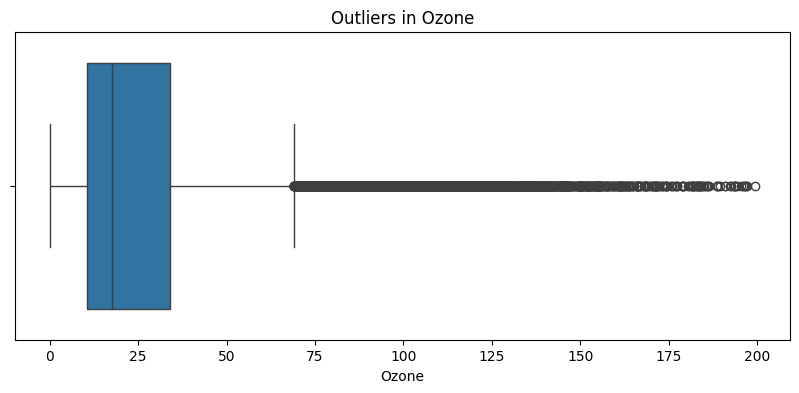

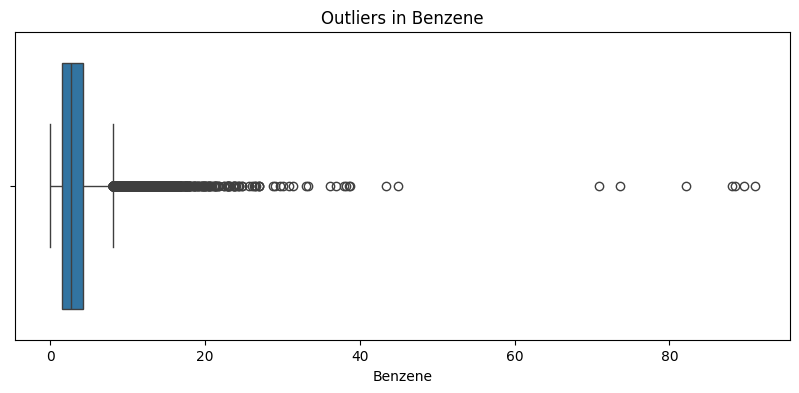

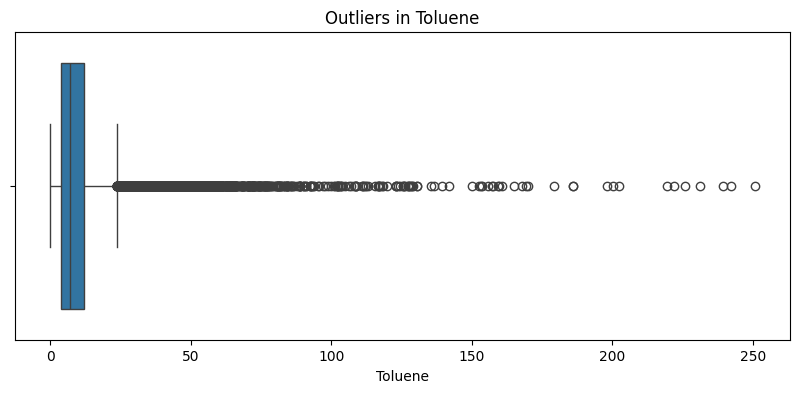

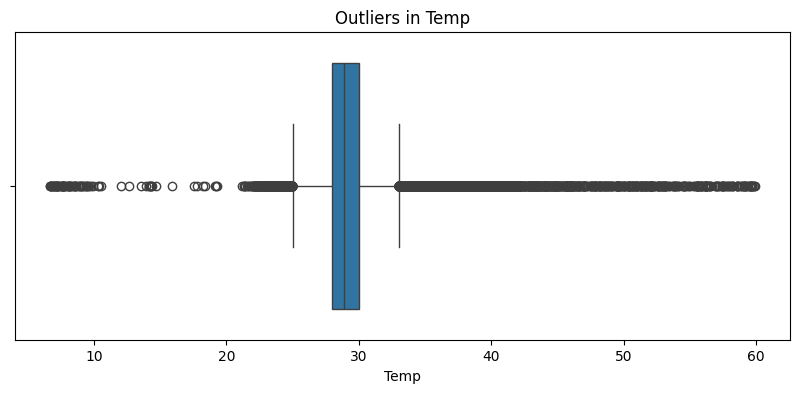

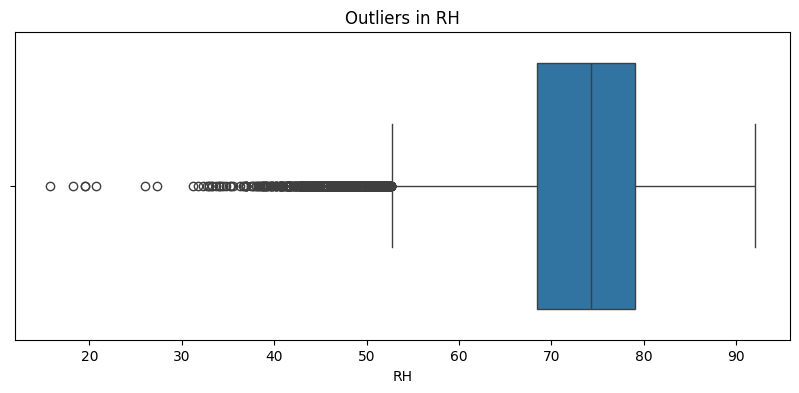

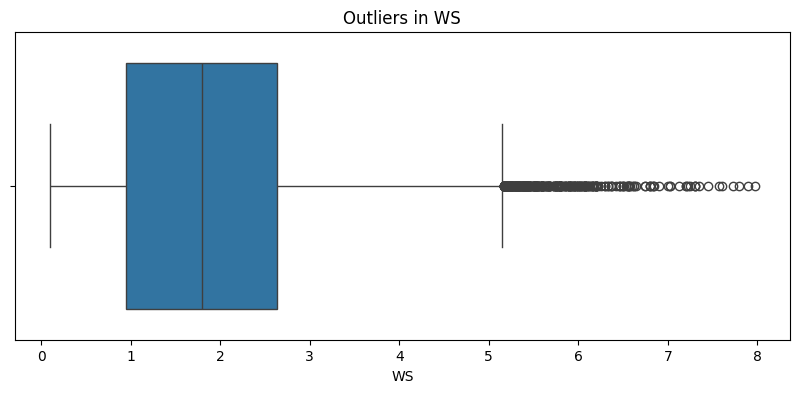

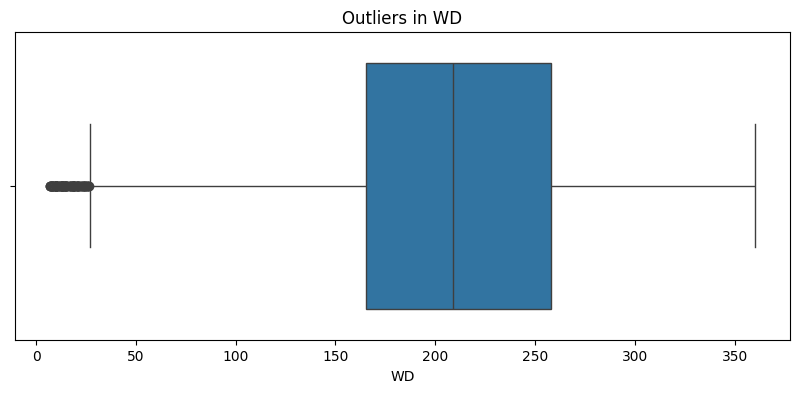

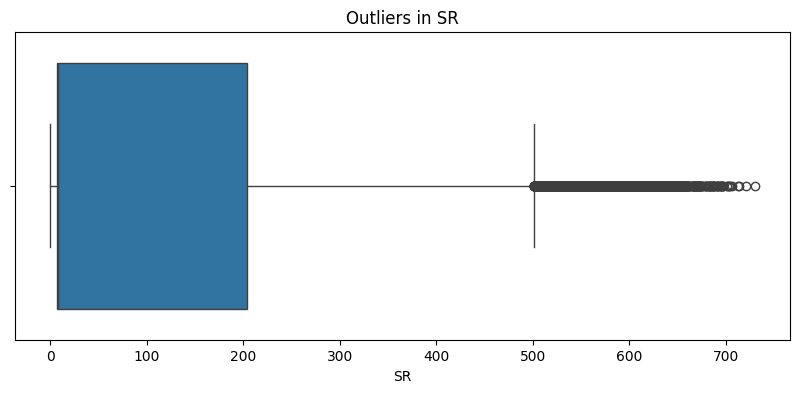

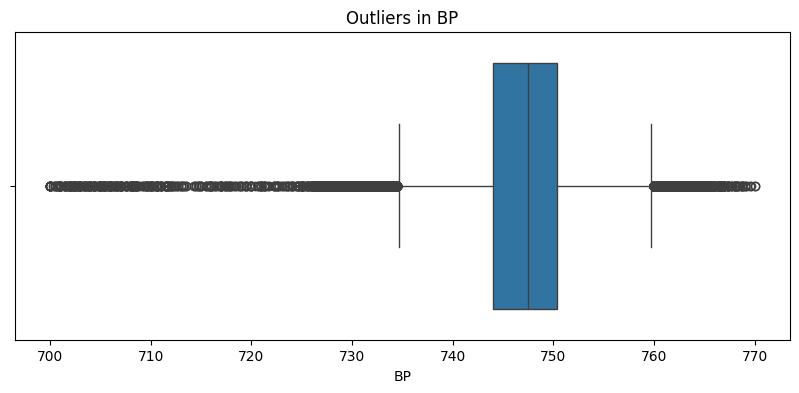

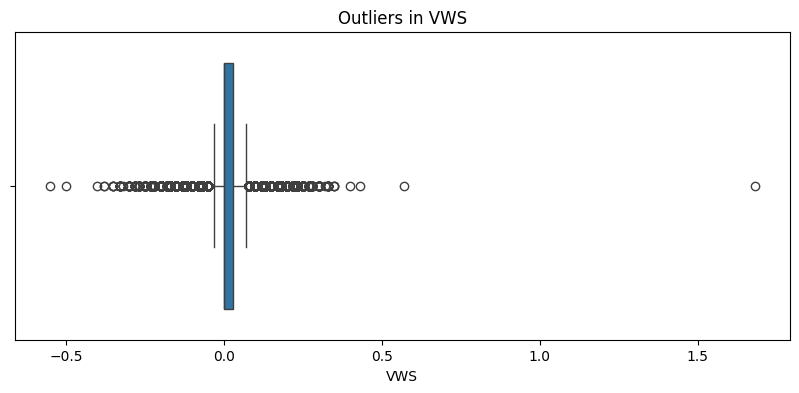

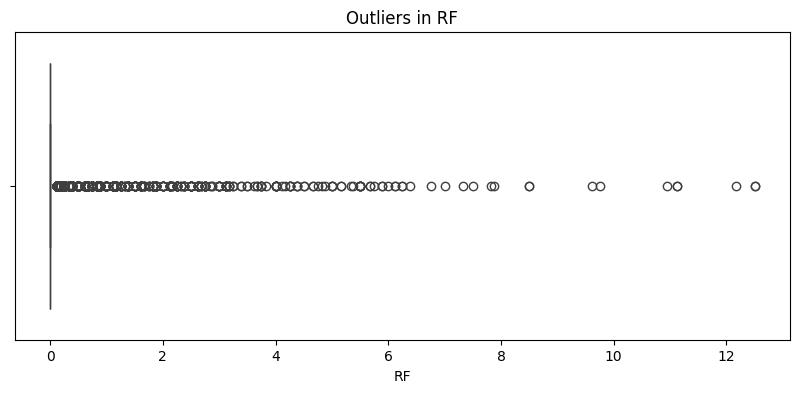

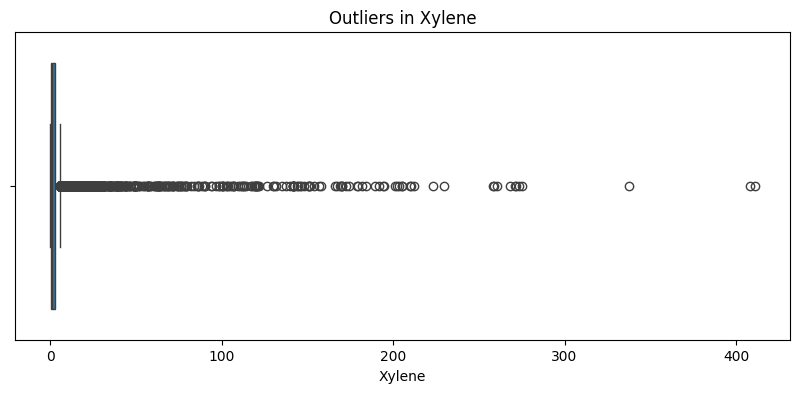

In [76]:
cek_outliers = df.columns.drop('AT')

for column in cek_outliers:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Outliers in {column}')
    plt.show()

In [77]:
robust = cek_outliers
print(f'Robust:\n {robust}')

Robust:
 Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone',
       'Benzene', 'Toluene', 'Temp', 'RH', 'WS', 'WD', 'SR', 'BP', 'VWS', 'RF',
       'Xylene'],
      dtype='object')


### Split into train, val, and test data

In [78]:
train_df, temp_df = train_test_split(df, test_size=0.2, shuffle=False)
val_df, test_df = train_test_split(temp_df, test_size=0.5, shuffle=False)

print(f"Train: {len(train_df)}\nValidation: {len(val_df)}\nTest: {len(test_df)}")

Train: 40320
Validation: 5040
Test: 5040


### Handle Outliers

In [79]:
rob_scaler = RobustScaler()

train_df = rob_scaler.fit_transform(train_df)
val_df = rob_scaler.transform(val_df)
test_df = rob_scaler.transform(test_df)

### Create Sequence Window

In [80]:
def create_sequences(data, lookback, forecast, target_idx):
    X, y = [], []

    if not isinstance(data, np.ndarray):
        data = data.to_numpy()

    for i in range(len(data) - lookback - forecast + 1):
        input_slice = data[i : i + lookback]
        X.append(input_slice)

        target_slice = data[i + lookback : i + lookback + forecast, target_col_index]
        y.append(target_slice)

    return np.array(X), np.array(y)

In [81]:
LOOKBACK = 5
FORECAST = 1

features = df.columns.tolist()
target_col_index = features.index('AT')

X_train, y_train = create_sequences(train_df, LOOKBACK, FORECAST, target_col_index)
X_val, y_val = create_sequences(val_df, LOOKBACK, FORECAST, target_col_index)
X_test, y_test = create_sequences(test_df, LOOKBACK, FORECAST, target_col_index)

In [82]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print()
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print()
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (40315, 5, 21)
y_train shape: (40315, 1)

X_val shape: (5035, 5, 21)
y_val shape: (5035, 1)

X_test shape: (5035, 5, 21)
y_test shape: (5035, 1)


## c) Baseline LSTM Model

In [83]:
model = Sequential()
model.add(LSTM(units=10, input_shape=(LOOKBACK, X_train.shape[2])))
model.add(Dense(units=1, activation='linear'))

In [84]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 10)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,291 (5.04 KB)

 Trainable params: 1,291 (5.04 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.4098 - mae: 0.4443 - val_loss: 0.0913 - val_mae: 0.2185
Epoch 2/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0845 - mae: 0.1618 - val_loss: 0.0582 - val_mae: 0.1637
Epoch 3/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0657 - mae: 0.1355 - val_loss: 0.0518 - val_mae: 0.1468
Epoch 4/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0634 - mae: 0.1300 - val_loss: 0.0502 - val_mae: 0.1466
Epoch 5/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.0623 - mae: 0.1262 - val_loss: 0.0497 - val_mae: 0.1448
Epoch 6/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0619 - mae: 0.1258 - val_loss: 0.0478 - val_mae: 0.1385
Epoch 7/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0617 - mae: 0.1228 - val_loss: 0.0484 - val_mae: 0.1375
Epoch 8/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0565 - mae: 0.1207 - val_loss: 0.0479 - val_mae: 0.1379
Epoch 9/50
1260/1260 ━━━━━━━━━━━━━━━━

## d) Modified LSTM Model

In [93]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [94]:
modified_model = Sequential()

modified_model.add(Bidirectional(LSTM(units=60, return_sequences=True), input_shape=(LOOKBACK, X_train.shape[2])))
modified_model.add(Dropout(0.3))
modified_model.add(Bidirectional(LSTM(units=30)))
modified_model.add(Dropout(0.3))
modified_model.add(Dense(units=1, activation='linear'))

In [95]:
modified_model.compile(optimizer='adam', loss='mean_squared_error')
modified_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 5, 120)         │        39,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 5, 120)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 60)             │        36,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,661 (295.55 KB)

 Trainable params: 75,661 (295.55 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
history_modified = modified_model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - loss: 0.2089 - val_loss: 0.0823
Epoch 2/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 0.0934 - val_loss: 0.0642
Epoch 3/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - loss: 0.0839 - val_loss: 0.0595
Epoch 4/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - loss: 0.0761 - val_loss: 0.0572
Epoch 5/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.0775 - val_loss: 0.0554
Epoch 6/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - loss: 0.0649 - val_loss: 0.0521
Epoch 7/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.0712 - val_loss: 0.0537
Epoch 8/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - loss: 0.0681 - val_loss: 0.0573
Epoch 9/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 0.0633 - val_loss: 0.0513
Epoch 10/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0644 - val_loss: 0.0517
Epoch 11/100
630/630 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0603 - val_loss: 0.0480
Epoch 12/100
630/63

## e) Evaluasi Model

In [98]:
pred_baseline = model.predict(X_test)
pred_modified = modified_model.predict(X_test)

eval_results = {
    "baseline": {
        "MAE": mean_absolute_error(y_test, pred_baseline),
        "MSE": mean_squared_error(y_test, pred_baseline),
        "R2 Score": r2_score(y_test, pred_baseline)
    },
    "modified": {
        "MAE": mean_absolute_error(y_test, pred_modified),
        "MSE": mean_squared_error(y_test, pred_modified),
        "R2 Score": r2_score(y_test, pred_modified)
    }
}

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


In [99]:
print(f"{'':<12} | {'Baseline Model':<20} | {'Modified Model':<20}")
print("-" * 60)
for metric in ["MAE", "MSE", "R2 Score"]:
    baseline_val = eval_results['baseline'][metric]
    modified_val = eval_results['modified'][metric]
    print(f"{metric:<12} | {baseline_val:<20.4f} | {modified_val:<20.4f}")

             | Baseline Model       | Modified Model      
------------------------------------------------------------
MAE          | 0.1483               | 0.1514              
MSE          | 0.0453               | 0.0456              
R2 Score     | 0.9336               | 0.9332              


## f) Video Explanation

Link Google Drive https://drive.google.com/drive/folders/1puMep-XB24TnXWp0DLp9LwMGNh_oZWKY?usp=drive_link

## g) Pertanyaan Bonus

Berdasarkan deskripsi yang dijabarkan oleh soal, problem ini sendiri sudah termasuk kasus time series multivariate karena tujuannya adalah memprediksi satu variabel target, yaitu kondisi kualitas udara (AT), dengan memanfaatkan informasi dari banyak variabel lain yang saling terkait dari waktu ke waktu. Sebuah masalah dapat diidentifikasi sebagai multivariate ketika prediksi untuk satu variabel tidak hanya bergantung pada nilai historisnya sendiri, tetapi juga pada nilai historis dari variabel-variabel lain. Dalam kasus ini, model akan memprediksi nilai AT satu jam ke depan dengan menggunakan data dari lima jam sebelumnya yang tidak hanya mencakup AT itu sendiri, tetapi juga berbagai variabel prediktor lain seperti PM10, CO, NO2, dan kecepatan angin, dengan asumsi bahwa semua variabel ini secara kolektif memengaruhi kondisi suhu udara di masa depan.